COVID-19 is is a contagious respiratory disease that was first identified in Wuhan, China in 2019. The disease is caused by a new strain of the coronavirus. Symptoms include: fever, cough, headache, loss of taste or smell, shortness of breath, muscle pain, etc. Although COVID-19 might not be fatal, it is contagious and spreads similarly to the common cold. 

One of the main goals of the scientinsts today is to "flatten the curve", which means having a distribution of the number of cases over a longer period of time. Slowing down the infection spread prevents overburdening the health care system and allows for better medical care for those infected. Currently COVID-19 has an exponential growth rate around the world, wich will be calculated and seen in this notebook. 

This notebook will also look at the distribution across time and across countries of the Covid-19 cases, paying close attention at:
- the total number of confirmed cases, which I will refer as "Confirmed"
- the total number of people that recovered after being infected, which I will refer as "Recovered"
- the total number of people that died as a result of the virus, which I will refer as "Deaths"


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# Reading the csv file using the "read_csv" from the panda library
data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

In [3]:
#Displaying the first entries in the csv file
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
#Looking at the datatset's shape/length of the corresponding array and null values 
print("Size/shape of the dataset:", data.shape)
print("Null values in the dataset", data.isnull().sum())

Size/shape of the dataset: (172480, 8)
Null values in the dataset SNo                    0
ObservationDate        0
Province/State     47883
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [5]:
#Dropping SNo, since it does not have a use for the current analysis and Province/State, 
#since it has many null values
data.drop(["SNo"], 1, inplace = True)

In [6]:
#Visualizing the result in the dataset
data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
172475,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0


In [7]:
#Converting to standard date format
data["ObservationDate"] = pd.to_datetime(data["ObservationDate"])

In [8]:
#Grouping and aggregating by country
grouped_country = data.groupby(["Country/Region", "ObservationDate"]).agg({"Confirmed" : 'sum', "Recovered": 'sum', "Deaths": 'sum'})
#Visualizing the changes made to the data
grouped_country

Confirmed  Recovered  Deaths
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0        0.0     0.0
('St. Martin',)                2020-03-10             2.0        0.0     0.0
Afghanistan                    2020-02-24             1.0        0.0     0.0
                               2020-02-25             1.0        0.0     0.0
                               2020-02-26             1.0        0.0     0.0
...                                                   ...        ...     ...
occupied Palestinian territory 2020-03-12             0.0        0.0     0.0
                               2020-03-14             0.0        0.0     0.0
                               2020-03-15             0.0        0.0     0.0
                               2020-03-16             0.0        0.0     0.0
                               2020-03-17             0.0        0.0     0.0

[53014 rows x 3 columns]

In [9]:
grouped_country["Active Cases"] = grouped_country["Confirmed"] - grouped_country["Recovered"] - grouped_country["Deaths"]
grouped_country["log_confirmed"] = np.log(grouped_country["Confirmed"])
grouped_country["log_active"] = np.log(grouped_country["Active Cases"])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
#Grouping the cases by date
grouped_date = data.groupby(["ObservationDate"]).agg({"Confirmed": 'sum', "Recovered": 'sum', "Deaths": 'sum'})

In [11]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(data["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ", grouped_date["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",grouped_date["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",grouped_date["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(grouped_date["Confirmed"].iloc[-1] - grouped_date["Recovered"].iloc[-1] - grouped_date["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",grouped_date["Recovered"].iloc[-1] + grouped_date["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(grouped_date["Confirmed"].iloc[-1] / grouped_date.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(grouped_date["Recovered"].iloc[-1] / grouped_date.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(grouped_date["Deaths"].iloc[-1] / grouped_date.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(grouped_date["Confirmed"].iloc[-1] / ((grouped_date.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(grouped_date["Recovered"].iloc[-1] / ((grouped_date.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(grouped_date["Deaths"].iloc[-1] / ((grouped_date.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",grouped_date["Confirmed"].iloc[-1] - grouped_date["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",grouped_date["Recovered"].iloc[-1] - grouped_date["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",grouped_date["Deaths"].iloc[-1] - grouped_date["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  226
Total number of Confirmed Cases around the World:  67073728.0
Total number of Recovered Cases around the World:  43103827.0
Total number of Deaths Cases around the World:  1536056.0
Total number of Active Cases around the World:  22433845.0
Total number of Closed Cases around the World:  44639883.0
Approximate number of Confirmed Cases per Day around the World:  209605.0
Approximate number of Recovered Cases per Day around the World:  134699.0
Approximate number of Death Cases per Day around the World:  4800.0
Approximate number of Confirmed Cases per hour around the World:  8734.0
Approximate number of Recovered Cases per hour around the World:  5612.0
Approximate number of Death Cases per hour around the World:  200.0
Number of Confirmed Cases in last 24 hours:  533694.0
Number of Recovered Cases in last 24 hours:  313948.0
Number of Death Cases in last 24 hours:  7188.0


In [12]:
figure = px.bar(x = grouped_date.index, y = grouped_date["Confirmed"] - grouped_date["Recovered"] - grouped_date["Deaths"])
figure.update_layout(title = "Worldwide Distribution of Number of Active Cases" , xaxis_title = "Date", yaxis_title = "Number of Cases")
figure.show()

Closed Cases = number of recovered cases + number of death cases

In [13]:
figure = px.bar(x = grouped_date.index, y = grouped_date["Recovered"] + grouped_date["Deaths"])
figure.update_layout(title = "Worldwide Distribution of Number of Closed Cases", xaxis_title = "Date", yaxis_title = "Number of Cases")
figure.show()

Calculating Mortality and Recovery Rates around the World:

In [14]:
#Mortality Rate = (Number of death cases / Number of confirmed cases) * 100
grouped_date["Mortality Rate"] = (grouped_date["Deaths"] / grouped_date["Confirmed"]) * 100
#Recovery Rate = (Number of recovered cases  / Number of confirmed cases) * 100
grouped_date["Recovery Rate"] = (grouped_date["Recovered"] / grouped_date["Confirmed"]) * 100
#Number of Active Cases = Number of confirmed cases - Number of death cases - Number of recovered cases
grouped_date["Active Cases"] = grouped_date["Confirmed"] - grouped_date["Deaths"] - grouped_date["Recovered"]
#Number of Closes Cases = Number of recovered cases + Number of death cases
grouped_date["Closed Cases"] = grouped_date["Recovered"] + grouped_date["Deaths"]

print("Average Mortality Rate", grouped_date["Mortality Rate"].mean())
print("Median Mortality Rate", grouped_date["Mortality Rate"].median())
print("Average Recovery Rate", grouped_date["Recovery Rate"].mean())
print("Median Recovery Rate", grouped_date["Recovery Rate"].median())

Average Mortality Rate 4.058763856689485
Median Mortality Rate 3.5552494073726955
Average Recovery Rate 47.750118711440294
Median Recovery Rate 54.09568616953504


In [15]:
#Mortality Rate and Recovery Rate Plot
figure = make_subplots(rows = 2,cols = 1, subplot_titles =("Recovery Rate", "Mortality Rate"))
figure.add_trace(go.Scatter(x = grouped_date.index, y = (grouped_date["Recovered"] / grouped_date["Confirmed"]) * 100, name = "Recovery Rate"), row = 1, col = 1)
figure.add_trace(go.Scatter(x = grouped_date.index, y = (grouped_date["Deaths"]/grouped_date["Confirmed"]) * 100, name = "Mortality Rate"), row = 2, col = 1)
figure.update_layout( height = 1000, legend = dict(x = -0.1, y = 1.2, traceorder = "normal"))
figure.update_xaxes(title_text = "Date", row = 1, col = 1)
figure.update_yaxes(title_text = "Recovery Rate", row = 1, col = 1)
figure.update_xaxes(title_text = "Date", row = 1, col = 2)
figure.update_yaxes(title_text = "Mortality Rate", row = 1, col = 2)
figure.show()

We know that the number of closed cases is the sum of recovered cases and death cases. From the end of March, we can see a steady increase in recovery rates, and from the end of April we can see a decrease in mortality rate, both of which reflecting a positive change in survival and both changes leading to an increase in the number of closed cases. 

In [16]:
#Calculating the average change in the number of total cases from day to day
print("Average increase in the number of cases every day:" , np.round(grouped_date["Confirmed"].diff().fillna(0).mean()))

#Calculating the average change in the number of recovered cases from day to day
print("Average increase in the number of recovered cases every day:", np.round(grouped_date["Recovered"].diff().fillna(0).mean()))

#Calculating the average change in the number of deaths from day to day
print("Average increase in the number of death cases every day:", np.round(grouped_date["Deaths"].diff().fillna(0).mean()))



Average increase in the number of cases every day: 209604.0
Average increase in the number of recovered cases every day: 134699.0
Average increase in the number of death cases every day: 4800.0


In [17]:
#Plotting the daily changes in confirmed, recovered and death cases
figure = go.Figure()
figure.add_trace(go.Scatter(x = grouped_date.index, y = grouped_date["Confirmed"].diff().fillna(0), mode = 'lines+markers', name = 'Confirmed Cases'))
figure.add_trace(go.Scatter(x = grouped_date.index, y = grouped_date["Recovered"].diff().fillna(0), mode = 'lines+markers', name = 'Recovered Cases'))
figure.add_trace(go.Scatter(x = grouped_date.index, y = grouped_date["Deaths"].diff().fillna(0), mode = 'lines+markers', name = 'Death Cases'))
figure.update_layout(title = "Daily Increase in Different Types of Cases", xaxis_title = 'Date', yaxis_title = 'Number of Cases', legend = dict(x = 0, y = 1, traceorder = "normal"))
figure.show()

The growth factor is the factor by which the quantity multiplies itself over time. 
The growth factor for confirmed cases can be calculated as:
(Number of new confirmed cases everyday) / (Number of new confirmed cases in the previous day)
The growth factor for recovered cases can be calculated as:
(Number of new recovered cases everyday) / (Number of new recovered cases in the previous day)
The growth factor for death cases can be calculated as:
(Number of new death cases everyday) / (Number of new death cases in the previous day)

In [18]:
#Calculating the growth factor for confirmed, recovered and death cases
print("Average growth factor of number of confirmed cases: ", (grouped_date["Confirmed"] / grouped_date["Confirmed"].shift()).mean())
print("Median growth factor of number of confirmed cases: ", (grouped_date["Confirmed"] / grouped_date["Confirmed"].shift()).median())
print("Average growth factor of number of recovered cases: ", (grouped_date["Recovered"] / grouped_date["Recovered"].shift()).mean())
print("Median growth factor of number of recovered cases: ", (grouped_date["Recovered"] / grouped_date["Recovered"].shift()).median())
print("Average growth factor of number of death cases: ", (grouped_date["Deaths"] / grouped_date["Deaths"].shift()).mean())
print("Median growth factor of number of death cases: ", (grouped_date["Deaths"] / grouped_date["Deaths"].shift()).median())


Average growth factor of number of confirmed cases:  1.0399402922323804
Median growth factor of number of confirmed cases:  1.0166498743993266
Average growth factor of number of recovered cases:  1.0485227401725867
Median growth factor of number of recovered cases:  1.0214816243889693
Average growth factor of number of death cases:  1.0387711531071646
Median growth factor of number of death cases:  1.0097199552251062


A growth factor of 1 indicates there is no change in the rate of growth of cases from one day to another. A growth factor below 1 indicates a decrease in the number of new cases from day to day.

A growth factor above 1 and trending upward is a negative sign, indicating an exponential growth. This can be noticed in the numbers presented above, indicating an exponential growth in the number of new daily cases.

In [19]:
#Plotting the growth factor for confirmed, recovered and death cases
figure = go.Figure()
figure.add_trace(go.Scatter(x = grouped_date.index, y = grouped_date["Confirmed"] / grouped_date["Confirmed"].shift(), mode = 'lines', name = 'Growth Factor of Confirmed Cases'))
figure.add_trace(go.Scatter(x = grouped_date.index, y = grouped_date["Recovered"] / grouped_date["Recovered"].shift(), mode = 'lines', name = 'Growth Factor of Recovered Cases'))
figure.add_trace(go.Scatter(x = grouped_date.index, y = grouped_date["Deaths"] / grouped_date["Deaths"].shift(), mode = 'lines', name = 'Growth Factor of Death Cases'))
figure.update_layout(title = "Growth Factor for different types of cases", xaxis_title = "Date", yaxis_title = "Growth Factor", legend = dict(x = 0, y = -0.4, traceorder = "normal"))
figure.show()

In [20]:
#Plotting only the active and closed cases
figure = go.Figure()
figure.add_trace(go.Scatter(x = grouped_date.index, y = (grouped_date["Confirmed"] - grouped_date["Recovered"] - grouped_date["Deaths"]) / (grouped_date["Confirmed"] - grouped_date["Recovered"] - grouped_date["Deaths"]).shift(), mode = 'lines', name = 'Grouth Factor of Active Cases'))
figure.add_trace(go.Scatter(x = grouped_date.index, y = (grouped_date["Recovered"] + grouped_date["Deaths"]) / (grouped_date["Recovered"] + grouped_date["Deaths"]).shift(), mode = 'lines', name = 'Growth Factor for Closes Cases'))
figure.update_layout(title = "Growth Factor of Active and Closed Cases", xaxis_title = "Date", yaxis_title = "Growth Factor", legend = dict(x = 0, y = -0.4, traceorder = 'normal'))
figure.show()

Country Specific Analysis 

In [21]:
#Grouping the data by country
grouped_country = data[data["ObservationDate"] == data["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed" : 'sum', "Recovered": 'sum', "Deaths": 'sum'}).sort_values(["Confirmed"], ascending = False)
grouped_country["Mortality"] = (grouped_country["Deaths"] / grouped_country["Confirmed"]) * 100
grouped_country["Recovery"] = (grouped_country["Recovered"] / grouped_country["Confirmed"]) *100

In [22]:
Grouped_country = pd.DataFrame(list(zip(grouped_country.index, grouped_country["Confirmed"], grouped_country["Recovered"], grouped_country["Deaths"])), columns = ["Country/Region", "Confirmed", "Recovered", "Deaths"])

In [23]:
#Visualing the first 20 entries in the dataframe
Grouped_country.head(20)

,Country/Region,Confirmed,Recovered,Deaths
0,US,14757000.0,5624444.0,282299.0
1,India,9677203.0,9139901.0,140573.0
2,Brazil,6603540.0,5866657.0,176941.0
3,Russia,2439163.0,1920744.0,42675.0
4,France,2345648.0,175220.0,55247.0
5,Italy,1728878.0,913494.0,60078.0
6,UK,1727751.0,3736.0,61342.0
7,Spain,1684647.0,150376.0,46252.0
8,Argentina,1463110.0,1294692.0,39770.0
9,Colombia,1371103.0,1257410.0,37808.0


In [24]:
#Calculating the top 20 countries in terms of confirmed, recovered and death cases
top20_confirmed = Grouped_country.sort_values(["Confirmed"], ascending = False).head(20)
top20_recovered = Grouped_country.sort_values(["Recovered"], ascending = False).head(20)
top20_deaths = Grouped_country.sort_values(["Deaths"], ascending = False).head(20)

In [25]:
#Displaying the top 20 countries with highest number of confirmed cases
top20_confirmed.head(20)

,Country/Region,Confirmed,Recovered,Deaths
0,US,14757000.0,5624444.0,282299.0
1,India,9677203.0,9139901.0,140573.0
2,Brazil,6603540.0,5866657.0,176941.0
3,Russia,2439163.0,1920744.0,42675.0
4,France,2345648.0,175220.0,55247.0
5,Italy,1728878.0,913494.0,60078.0
6,UK,1727751.0,3736.0,61342.0
7,Spain,1684647.0,150376.0,46252.0
8,Argentina,1463110.0,1294692.0,39770.0
9,Colombia,1371103.0,1257410.0,37808.0


In [26]:
#Displaying the top 20 countries with highest number of death cases
top20_deaths.head(20)

,Country/Region,Confirmed,Recovered,Deaths
0,US,14757000.0,5624444.0,282299.0
2,Brazil,6603540.0,5866657.0,176941.0
1,India,9677203.0,9139901.0,140573.0
11,Mexico,1175850.0,866186.0,109717.0
6,UK,1727751.0,3736.0,61342.0
5,Italy,1728878.0,913494.0,60078.0
4,France,2345648.0,175220.0,55247.0
13,Iran,1040547.0,730798.0,50310.0
7,Spain,1684647.0,150376.0,46252.0
3,Russia,2439163.0,1920744.0,42675.0


Text(0.5, 1.0, 'Top 20 countries with highest number of death cases')

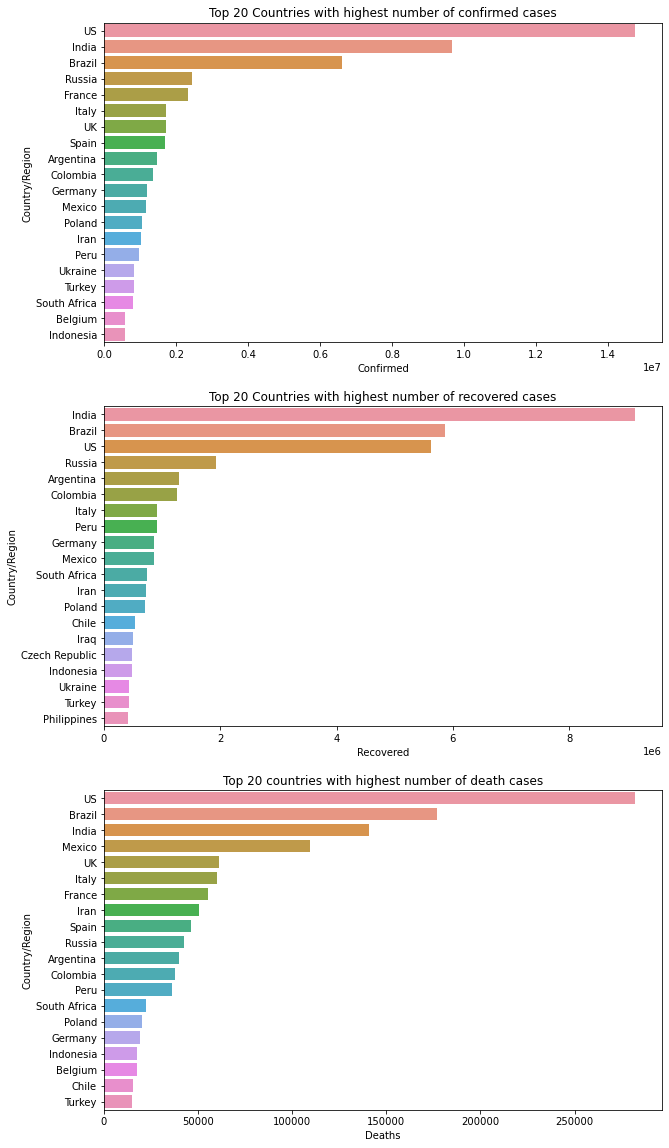

In [27]:
#Plotting the top 20 countries in terms of confirmed, recovered and death cases
figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 20))
top20_confirmed.keys()

sns.barplot(x = top20_confirmed["Confirmed"], y = top20_confirmed["Country/Region"], ax = ax1)
ax1.set_title("Top 20 Countries with highest number of confirmed cases")

sns.barplot(x = top20_recovered["Recovered"], y = top20_recovered["Country/Region"], ax = ax2)
ax2.set_title("Top 20 Countries with highest number of recovered cases")

sns.barplot(x = top20_deaths["Deaths"], y = top20_deaths["Country/Region"], ax = ax3)
ax3.set_title("Top 20 countries with highest number of death cases")



In [28]:
Grouped_country.head()

,Country/Region,Confirmed,Recovered,Deaths
0,US,14757000.0,5624444.0,282299.0
1,India,9677203.0,9139901.0,140573.0
2,Brazil,6603540.0,5866657.0,176941.0
3,Russia,2439163.0,1920744.0,42675.0
4,France,2345648.0,175220.0,55247.0


In [29]:
#Looking at the countries that have the highest percentages of active, closed and recovered cases globally
Grouped_country["Proportion of Confirmed"] = round((Grouped_country["Confirmed"] / Grouped_country["Confirmed"].sum()) * 100)
Grouped_country["Proportion of Recovered"] = round ((Grouped_country["Recovered"] / Grouped_country["Recovered"].sum()) * 100)
Grouped_country["Proportionof Deaths"] = round((Grouped_country["Deaths"] / Grouped_country["Deaths"].sum()) * 100)

In [30]:
Grouped_country.head(20)

,Country/Region,Confirmed,Recovered,Deaths,Proportion of Confirmed,Proportion of Recovered,Proportionof Deaths
0,US,14757000.0,5624444.0,282299.0,22.0,13.0,18.0
1,India,9677203.0,9139901.0,140573.0,14.0,21.0,9.0
2,Brazil,6603540.0,5866657.0,176941.0,10.0,14.0,12.0
3,Russia,2439163.0,1920744.0,42675.0,4.0,4.0,3.0
4,France,2345648.0,175220.0,55247.0,3.0,0.0,4.0
5,Italy,1728878.0,913494.0,60078.0,3.0,2.0,4.0
6,UK,1727751.0,3736.0,61342.0,3.0,0.0,4.0
7,Spain,1684647.0,150376.0,46252.0,3.0,0.0,3.0
8,Argentina,1463110.0,1294692.0,39770.0,2.0,3.0,3.0
9,Colombia,1371103.0,1257410.0,37808.0,2.0,3.0,2.0


References:
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting/notebook#Countrywise-Analysis